In [1]:
!pip install keras-tcn
!pip install keras-tcn --no-dependencies

     |████████████████████████████████| 706kB 4.7MB/s 


In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np

import keras 
import pandas as pd


from keras.models import Sequential
from keras.layers import Dense 

from keras.layers import Dropout

from keras.layers import LSTM

from keras.layers import *


from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split

from keras.callbacks import EarlyStopping

from tcn import TCN, tcn_full_summary

In [3]:
df=pd.read_csv("FB.csv")
print("Number of rows and columns:", df.shape)
df.head(5)
training_set = df.iloc[:1100, 4:5].values

test_set = df.iloc[1100:, 4:5].values
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

Number of rows and columns: (1503, 7)


DATA WINDOW 60

In [4]:

X_train60 = []
y_train60 = []
for i in range(60, 1100):
    X_train60.append(training_set_scaled[i-60:i, 0])
    y_train60.append(training_set_scaled[i, 0])
X_train60, y_train60 = np.array(X_train60), np.array(y_train60)
X_train60 = np.reshape(X_train60, (X_train60.shape[0], X_train60.shape[1], 1))

X_train60.shape

(1040, 60, 1)

TEST DATA WINDOW 60

In [5]:

dataset_train = df.iloc[:1100, 1:2]
dataset_test = df.iloc[1100:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
len(inputs)


463

In [6]:
X_test60 = []
for i in range(60, 463):
    X_test60.append(inputs[i-60:i, 0])
X_test60 = np.array(X_test60)
X_test60 = np.reshape(X_test60, (X_test60.shape[0], X_test60.shape[1], 1))
X_test60.shape

(403, 60, 1)

DATA WINDOW 1

In [7]:

X_train1 = []
y_train1 = []
for i in range(1, 1100):
    X_train1.append(training_set_scaled[i-1:i, 0])
    y_train1.append(training_set_scaled[i, 0])
X_train1, y_train1 = np.array(X_train1), np.array(y_train1)
X_train1 = np.reshape(X_train1, (X_train1.shape[0], X_train1.shape[1], 1))
X_train1.shape

(1099, 1, 1)

TEST DATA WINDOW 1

In [8]:

dataset_train = df.iloc[:1100, 4:5]
dataset_test = df.iloc[1100:, 4:5]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 1:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
len(inputs)

404

In [9]:

X_test1 = []
for i in range(1, 404):
    X_test1.append(inputs[i-1:i, 0])
X_test1 = np.array(X_test1)
X_test1 = np.reshape(X_test1, (X_test1.shape[0], X_test1.shape[1], 1))
print(X_test1.shape)

(403, 1, 1)


DATA WINDOW 30

In [10]:

X_train30 = []
y_train30 = []
for i in range(30, 1100):
    X_train30.append(training_set_scaled[i-30:i, 0])
    y_train30.append(training_set_scaled[i, 0])
X_train30, y_train30 = np.array(X_train30), np.array(y_train30)
X_train30 = np.reshape(X_train30, (X_train30.shape[0], X_train30.shape[1], 1))
X_train30.shape

(1070, 30, 1)

TEST DATA WINDOW 30

In [11]:

dataset_train = df.iloc[:1100, 4:5]
dataset_test = df.iloc[1100:, 4:5]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 30:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
len(inputs)

433

In [12]:

X_test30 = []
for i in range(30, 433):
    X_test30.append(inputs[i-30:i, 0])
X_test30 = np.array(X_test30)
X_test30 = np.reshape(X_test30, (X_test30.shape[0], X_test30.shape[1], 1))
print(X_test30.shape)

(403, 30, 1)


DATA WINDOW 90

In [13]:

X_train90 = []
y_train90 = []
for i in range(90, 1100):
    X_train90.append(training_set_scaled[i-90:i, 0])
    y_train90.append(training_set_scaled[i, 0])
X_train90, y_train90 = np.array(X_train90), np.array(y_train90)
X_train90 = np.reshape(X_train90, (X_train90.shape[0], X_train90.shape[1], 1))
X_train90.shape

(1010, 90, 1)

TEST DATA WINDOW 90

In [14]:

dataset_train = df.iloc[:1100, 4:5]
dataset_test = df.iloc[1100:, 4:5]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 90:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
len(inputs)

493

In [15]:

X_test90 = []
for i in range(90, 493):
    X_test90.append(inputs[i-90:i, 0])
X_test90 = np.array(X_test90)
X_test90 = np.reshape(X_test90, (X_test90.shape[0], X_test90.shape[1], 1))
print(X_test90.shape)

(403, 90, 1)


GRU 1

In [ ]:
model = Sequential()
model.add(GRU(units = 700, input_shape = (X_train1.shape[1], 1)))
model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train1, y_train1, epochs = 30, batch_size = 32)

Epoch 1/10
35/35 [==============================] - 1s 3ms/step - loss: 0.2236
Epoch 2/10
35/35 [==============================] - 0s 3ms/step - loss: 0.0555
Epoch 3/10
35/35 [==============================] - 0s 2ms/step - loss: 0.0330
Epoch 4/10
35/35 [==============================] - 0s 3ms/step - loss: 0.0266
Epoch 5/10
35/35 [==============================] - 0s 2ms/step - loss: 0.0210
Epoch 6/10
35/35 [==============================] - 0s 2ms/step - loss: 0.0135
Epoch 7/10
35/35 [==============================] - 0s 3ms/step - loss: 0.0095
Epoch 8/10
35/35 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 9/10
35/35 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 10/10
35/35 [==============================] - 0s 3ms/step - loss: 0.0021


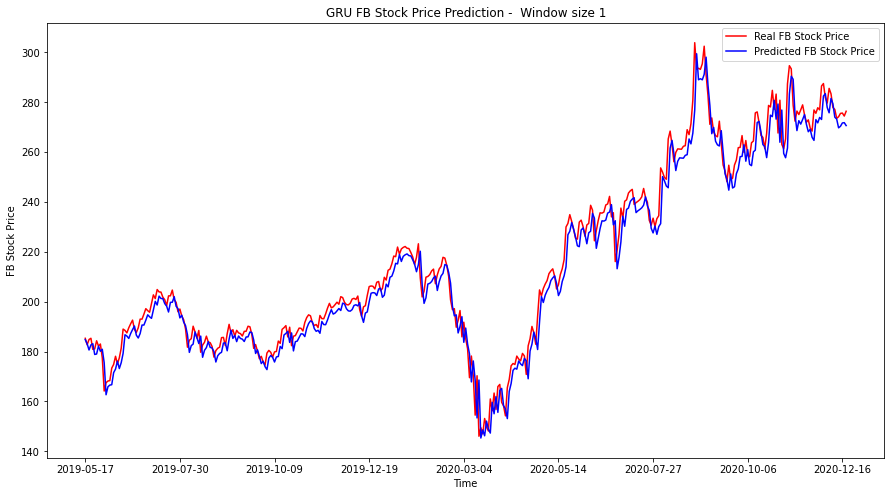

In [ ]:
predicted_stock_price = model.predict(X_test1)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(403,) 
x = df.loc[1100: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real FB Stock Price")
plt.plot(df.loc[1100:, "Date"],predicted_stock_price, color = "blue", label = "Predicted FB Stock Price")
plt.xticks(np.arange(0,403,50))
plt.title('GRU FB Stock Price Prediction -  Window size 1')
plt.xlabel('Time')
plt.ylabel('FB Stock Price')
plt.legend()
plt.show() 

In [ ]:
abse = mean_absolute_error(predicted_stock_price, y)
abse

4.614968360128626

In [ ]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))

rmse

6.064652570083007

TCN 1

In [16]:
np.random.seed(1)
model = Sequential()
model.add(TCN(nb_filters=64, kernel_size=4, nb_stacks=1, dilations=[1, 2, 4, 8, 16 ], padding='causal', use_skip_connections=False, dropout_rate=0.1, return_sequences=False, activation='relu', input_shape = (X_train1.shape[1], 1)))
#model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train1, y_train1, epochs = 100, batch_size = 32)

Epoch 1/100
35/35 [==============================] - 18s 9ms/step - loss: 0.0272
Epoch 2/100
35/35 [==============================] - 0s 6ms/step - loss: 0.0065
Epoch 3/100
35/35 [==============================] - 0s 6ms/step - loss: 0.0037
Epoch 4/100
35/35 [==============================] - 0s 6ms/step - loss: 0.0031
Epoch 5/100
35/35 [==============================] - 0s 6ms/step - loss: 0.0021
Epoch 6/100
35/35 [==============================] - 0s 6ms/step - loss: 0.0017
Epoch 7/100
35/35 [==============================] - 0s 6ms/step - loss: 0.0013
Epoch 8/100
35/35 [==============================] - 0s 6ms/step - loss: 9.4109e-04
Epoch 9/100
35/35 [==============================] - 0s 6ms/step - loss: 0.0012
Epoch 10/100
35/35 [==============================] - 0s 6ms/step - loss: 7.7149e-04
Epoch 11/100
35/35 [==============================] - 0s 6ms/step - loss: 8.6096e-04
Epoch 12/100
35/35 [==============================] - 0s 7ms/step - loss: 6.8335e-04
Epoch 13/100
35/35 [

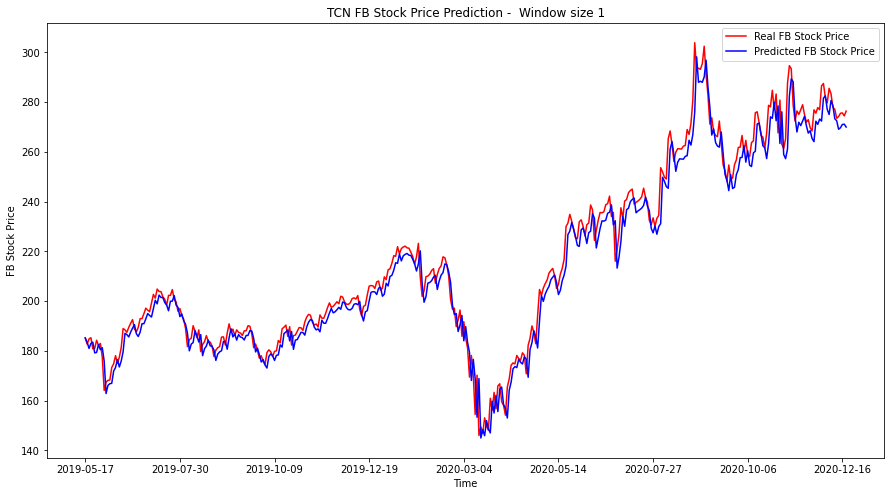

In [17]:
predicted_stock_price = model.predict(X_test1)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(403,) 
x = df.loc[1100: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real FB Stock Price")
plt.plot(df.loc[1100:, "Date"],predicted_stock_price, color = "blue", label = "Predicted FB Stock Price")
plt.xticks(np.arange(0,403,50))
plt.title('TCN FB Stock Price Prediction -  Window size 1')
plt.xlabel('Time')
plt.ylabel('FB Stock Price')
plt.legend()
plt.show() 

In [18]:
abse = mean_absolute_error(predicted_stock_price, y)
abse

4.600801880757599

In [19]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
rmse

6.107615416584279

GRU 30

In [ ]:
model = Sequential()
model.add(GRU(units = 700, input_shape = (X_train30.shape[1], 1)))
model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train30, y_train30, epochs = 30, batch_size = 32)

Epoch 1/30
34/34 [==============================] - 1s 9ms/step - loss: 0.0466
Epoch 2/30
34/34 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 3/30
34/34 [==============================] - 0s 7ms/step - loss: 7.2729e-04
Epoch 4/30
34/34 [==============================] - 0s 7ms/step - loss: 7.8392e-04
Epoch 5/30
34/34 [==============================] - 0s 7ms/step - loss: 7.8392e-04
Epoch 6/30
34/34 [==============================] - 0s 7ms/step - loss: 5.5273e-04
Epoch 7/30
34/34 [==============================] - 0s 7ms/step - loss: 9.7626e-04
Epoch 8/30
34/34 [==============================] - 0s 6ms/step - loss: 7.8959e-04
Epoch 9/30
34/34 [==============================] - 0s 7ms/step - loss: 6.9586e-04
Epoch 10/30
34/34 [==============================] - 0s 7ms/step - loss: 6.5452e-04
Epoch 11/30
34/34 [==============================] - 0s 7ms/step - loss: 6.1523e-04
Epoch 12/30
34/34 [==============================] - 0s 6ms/step - loss: 7.4336e-04
Epoch 13/

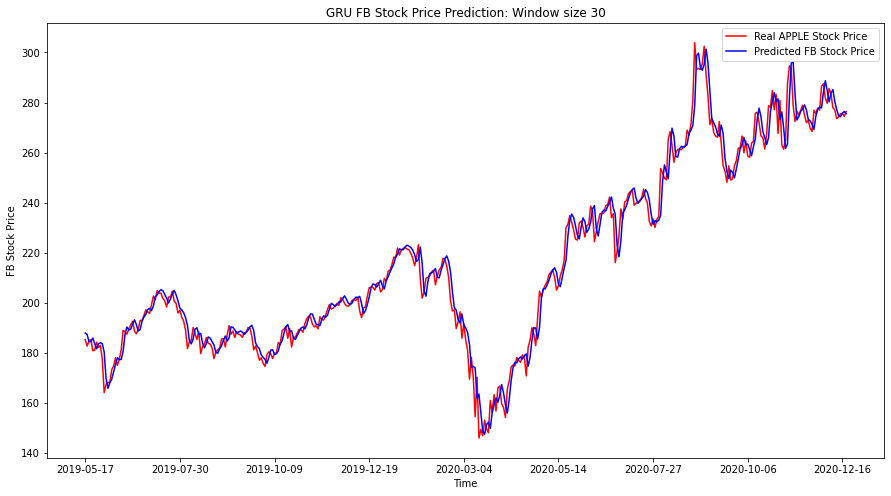

In [ ]:
predicted_stock_price = model.predict(X_test30)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(403,) 
x = df.loc[1100: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real APPLE Stock Price")
plt.plot(df.loc[1100:, "Date"],predicted_stock_price, color = "blue", label = "Predicted FB Stock Price")
plt.xticks(np.arange(0,403,50))
plt.title('GRU FB Stock Price Prediction: Window size 30')
plt.xlabel('Time')
plt.ylabel('FB Stock Price')
plt.legend()
plt.show() 

In [ ]:
abse = mean_absolute_error(predicted_stock_price, y)
abse

3.7921050322847196

In [ ]:
rmse=math.sqrt(mean_squared_error(predicted_stock_price,y))
rmse

5.43642867714249

TCN 30

In [20]:
np.random.seed(1)
model = Sequential()
model.add(TCN(nb_filters=64, kernel_size=4, nb_stacks=1, dilations=[1, 2, 4, 8, 16 ], padding='causal', use_skip_connections=False, dropout_rate=0.1, return_sequences=False, activation='relu', input_shape = (X_train30.shape[1], 1)))
#model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train30, y_train30, epochs = 100, batch_size = 32)

Epoch 1/100
34/34 [==============================] - 2s 10ms/step - loss: 12.5926
Epoch 2/100
34/34 [==============================] - 0s 6ms/step - loss: 0.1875
Epoch 3/100
34/34 [==============================] - 0s 7ms/step - loss: 0.1216
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 0.0778
Epoch 5/100
34/34 [==============================] - 0s 6ms/step - loss: 0.0565
Epoch 6/100
34/34 [==============================] - 0s 6ms/step - loss: 0.0565
Epoch 7/100
34/34 [==============================] - 0s 7ms/step - loss: 0.0408
Epoch 8/100
34/34 [==============================] - 0s 7ms/step - loss: 0.0308
Epoch 9/100
34/34 [==============================] - 0s 6ms/step - loss: 0.0321
Epoch 10/100
34/34 [==============================] - 0s 6ms/step - loss: 0.0284
Epoch 11/100
34/34 [==============================] - 0s 6ms/step - loss: 0.0218
Epoch 12/100
34/34 [==============================] - 0s 6ms/step - loss: 0.0218
Epoch 13/100
34/34 [===============

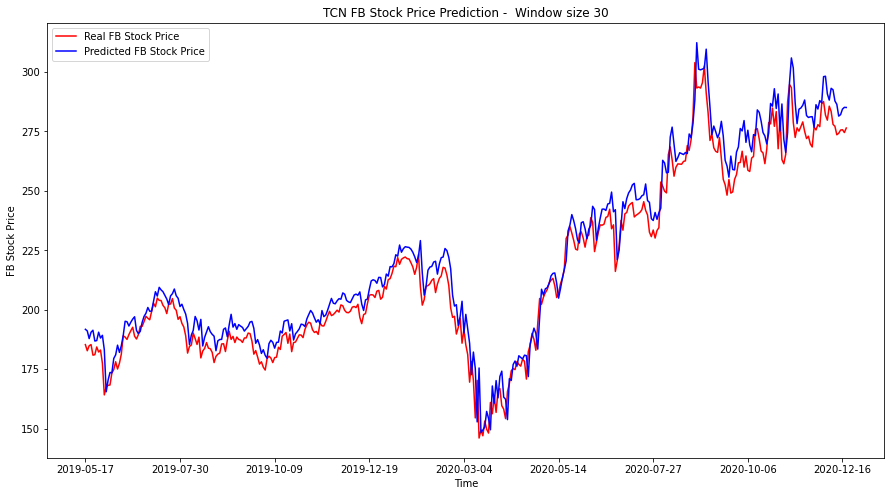

In [22]:
predicted_stock_price = model.predict(X_test30)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(403,) 
x = df.loc[1100: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real FB Stock Price")
plt.plot(df.loc[1100:, "Date"],predicted_stock_price, color = "blue", label = "Predicted FB Stock Price")
plt.xticks(np.arange(0,403,50))
plt.title('TCN FB Stock Price Prediction -  Window size 30')
plt.xlabel('Time')
plt.ylabel('FB Stock Price')
plt.legend()
plt.show() 

In [23]:
abse = mean_absolute_error(predicted_stock_price, y)
abse

6.497565911309708

In [24]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
rmse

8.096763445357151

GRU 60

In [ ]:
model = Sequential()
model.add(GRU(units = 700, input_shape = (X_train60.shape[1], 1)))
model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train60, y_train60, epochs = 30, batch_size = 32)

Epoch 1/30
33/33 [==============================] - 2s 14ms/step - loss: 0.0464
Epoch 2/30
33/33 [==============================] - 0s 11ms/step - loss: 0.0015
Epoch 3/30
33/33 [==============================] - 0s 11ms/step - loss: 7.4776e-04
Epoch 4/30
33/33 [==============================] - 0s 11ms/step - loss: 8.1247e-04
Epoch 5/30
33/33 [==============================] - 0s 11ms/step - loss: 7.8359e-04
Epoch 6/30
33/33 [==============================] - 0s 12ms/step - loss: 7.1596e-04
Epoch 7/30
33/33 [==============================] - 0s 11ms/step - loss: 7.0300e-04
Epoch 8/30
33/33 [==============================] - 0s 11ms/step - loss: 5.8732e-04
Epoch 9/30
33/33 [==============================] - 0s 11ms/step - loss: 6.9155e-04
Epoch 10/30
33/33 [==============================] - 0s 11ms/step - loss: 7.5609e-04
Epoch 11/30
33/33 [==============================] - 0s 11ms/step - loss: 6.7489e-04
Epoch 12/30
33/33 [==============================] - 0s 11ms/step - loss: 6.6815e-

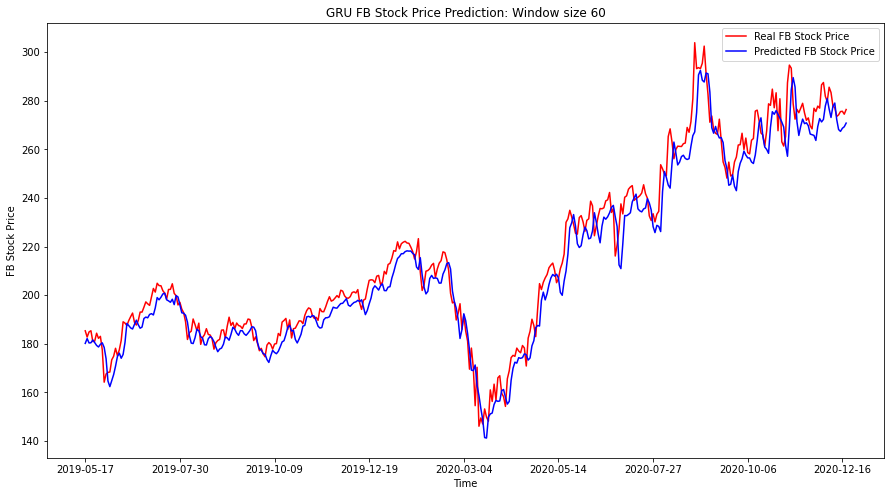

In [ ]:
predicted_stock_price = model.predict(X_test60)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(403,) 
x = df.loc[1100: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real FB Stock Price")
plt.plot(df.loc[1100:, "Date"],predicted_stock_price, color = "blue", label = "Predicted FB Stock Price")
plt.xticks(np.arange(0,403,50))
plt.title('GRU FB Stock Price Prediction: Window size 60')
plt.xlabel('Time')
plt.ylabel('FB Stock Price')
plt.legend()
plt.show() 

In [ ]:
abse = mean_absolute_error(predicted_stock_price, y)
abse

5.975657526461693

In [ ]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price, y))
rmse

7.730681374314852

TCN 60

In [32]:
np.random.seed(1)
model = Sequential()
model.add(TCN(nb_filters=64, kernel_size=4, nb_stacks=1, dilations=[1, 2, 4, 8, 16 ], padding='causal', use_skip_connections=False, dropout_rate=0.1, return_sequences=False, activation='relu', input_shape = (X_train60.shape[1], 1)))
#model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train60, y_train60, epochs = 100, batch_size = 32)

Epoch 1/100
33/33 [==============================] - 2s 6ms/step - loss: 24.7487
Epoch 2/100
33/33 [==============================] - 0s 7ms/step - loss: 0.3386
Epoch 3/100
33/33 [==============================] - 0s 6ms/step - loss: 0.1741
Epoch 4/100
33/33 [==============================] - 0s 7ms/step - loss: 0.1089
Epoch 5/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0670
Epoch 6/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0590
Epoch 7/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0487
Epoch 8/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0604
Epoch 9/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0328
Epoch 10/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0249
Epoch 11/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0237
Epoch 12/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0208
Epoch 13/100
33/33 [================

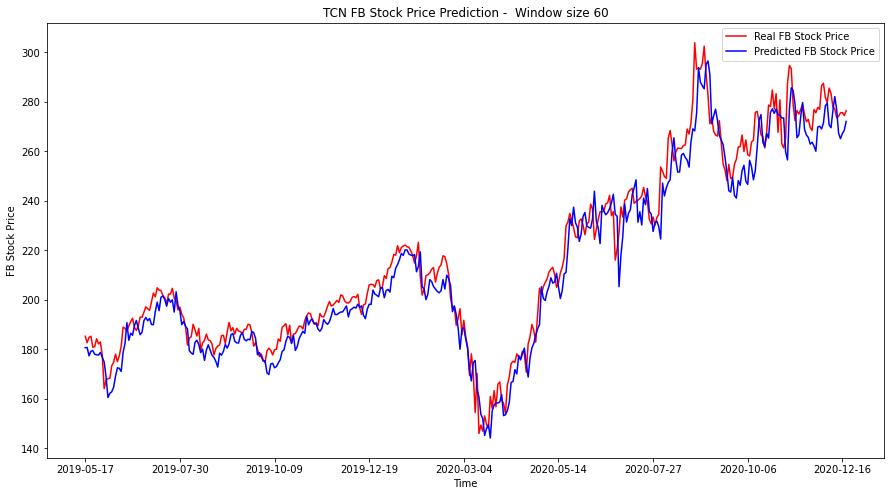

In [34]:
predicted_stock_price = model.predict(X_test60)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(403,) 
x = df.loc[1100: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real FB Stock Price")
plt.plot(df.loc[1100:, "Date"],predicted_stock_price, color = "blue", label = "Predicted FB Stock Price")
plt.xticks(np.arange(0,403,50))
plt.title('TCN FB Stock Price Prediction -  Window size 60')
plt.xlabel('Time')
plt.ylabel('FB Stock Price')
plt.legend()
plt.show() 

In [35]:
abse = mean_absolute_error(predicted_stock_price,y)
abse

6.254121318434495

In [36]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
rmse

8.021706781958812

GRU 90

In [ ]:
model = Sequential()
model.add(GRU(units = 700, input_shape = (X_train90.shape[1], 1)))
model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train90, y_train90, epochs = 30, batch_size = 32)

Epoch 1/30
32/32 [==============================] - 2s 18ms/step - loss: 0.0418
Epoch 2/30
32/32 [==============================] - 1s 16ms/step - loss: 0.0017
Epoch 3/30
32/32 [==============================] - 1s 16ms/step - loss: 6.5640e-04
Epoch 4/30
32/32 [==============================] - 1s 16ms/step - loss: 8.3264e-04
Epoch 5/30
32/32 [==============================] - 1s 16ms/step - loss: 5.8688e-04
Epoch 6/30
32/32 [==============================] - 1s 16ms/step - loss: 6.0373e-04
Epoch 7/30
32/32 [==============================] - 1s 16ms/step - loss: 6.7486e-04
Epoch 8/30
32/32 [==============================] - 1s 16ms/step - loss: 8.5248e-04
Epoch 9/30
32/32 [==============================] - 1s 16ms/step - loss: 7.2396e-04
Epoch 10/30
32/32 [==============================] - 1s 16ms/step - loss: 7.8665e-04
Epoch 11/30
32/32 [==============================] - 1s 16ms/step - loss: 6.7711e-04
Epoch 12/30
32/32 [==============================] - 1s 16ms/step - loss: 6.0284e-

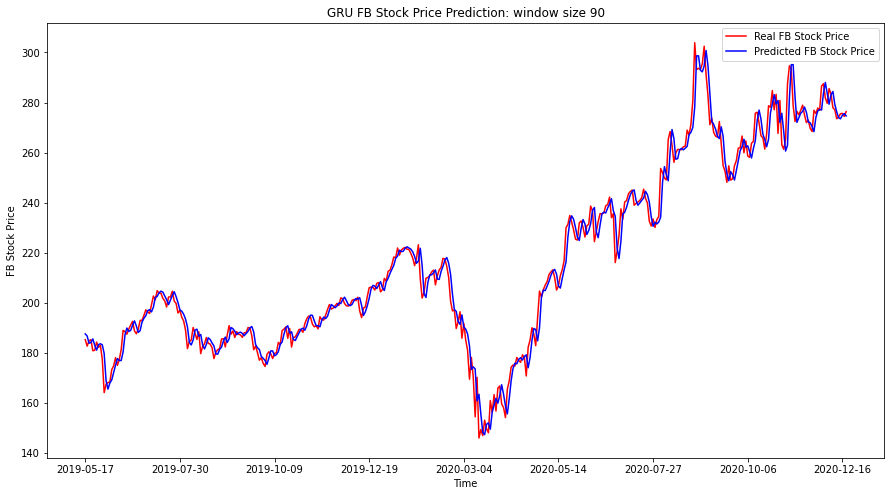

In [ ]:
predicted_stock_price = model.predict(X_test90)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(403,) 
x = df.loc[1100: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real FB Stock Price")
plt.plot(df.loc[1100:, "Date"],predicted_stock_price, color = "blue", label = "Predicted FB Stock Price")
plt.xticks(np.arange(0,403,50))
plt.title('GRU FB Stock Price Prediction: window size 90')
plt.xlabel('Time')
plt.ylabel('FB Stock Price')
plt.legend()
plt.show() 

In [ ]:
abse = mean_absolute_error(predicted_stock_price, y)
abse

3.769756609314418

In [ ]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
rmse

5.370889573706492

TCN 90

In [37]:
np.random.seed(1)
model = Sequential()
model.add(TCN(nb_filters=64, kernel_size=5, nb_stacks=1, dilations=[1, 2, 4, 8, 16 ], padding='causal', use_skip_connections=False, dropout_rate=0.1, return_sequences=False, activation='relu', input_shape = (X_train90.shape[1], 1)))
#model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train90, y_train90, epochs = 100, batch_size = 32)

Epoch 1/100
32/32 [==============================] - 2s 7ms/step - loss: 15.6462
Epoch 2/100
32/32 [==============================] - 0s 7ms/step - loss: 0.2213
Epoch 3/100
32/32 [==============================] - 0s 7ms/step - loss: 0.1127
Epoch 4/100
32/32 [==============================] - 0s 7ms/step - loss: 0.0818
Epoch 5/100
32/32 [==============================] - 0s 7ms/step - loss: 0.0572
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 0.0555
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 0.0476
Epoch 8/100
32/32 [==============================] - 0s 7ms/step - loss: 0.0420
Epoch 9/100
32/32 [==============================] - 0s 7ms/step - loss: 0.0361
Epoch 10/100
32/32 [==============================] - 0s 7ms/step - loss: 0.0322
Epoch 11/100
32/32 [==============================] - 0s 7ms/step - loss: 0.0303
Epoch 12/100
32/32 [==============================] - 0s 6ms/step - loss: 0.0220
Epoch 13/100
32/32 [================

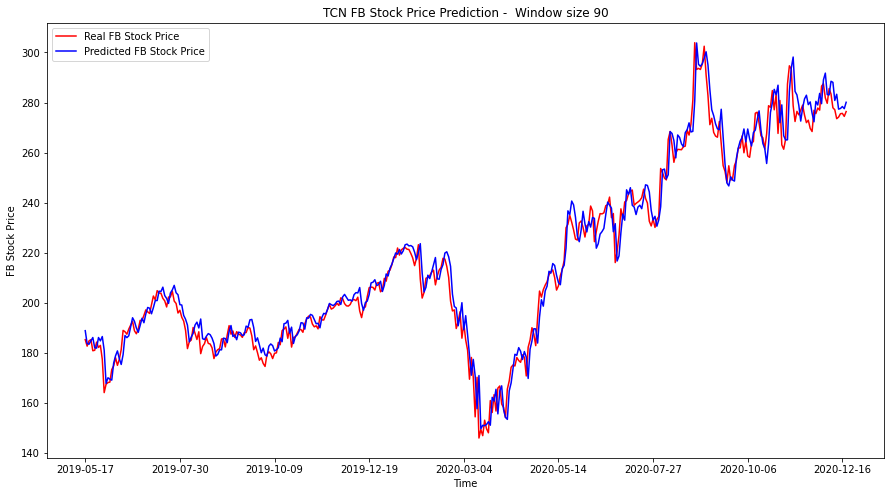

In [40]:
predicted_stock_price = model.predict(X_test90)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(403,) 
x = df.loc[1100: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real FB Stock Price")
plt.plot(df.loc[1100:, "Date"],predicted_stock_price, color = "blue", label = "Predicted FB Stock Price")
plt.xticks(np.arange(0,403,50))
plt.title('TCN FB Stock Price Prediction -  Window size 90')
plt.xlabel('Time')
plt.ylabel('FB Stock Price')
plt.legend()
plt.show() 

In [41]:
abse = mean_absolute_error(predicted_stock_price, y)
abse

4.319148234673058

In [42]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
rmse

5.952864339929641